In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import normalize_data
import random
import train

pd.set_option('display.max_columns', 999)

In [2]:
# For this model, the data preprocessing part is already completed with the exception of scaling.
# so we just need to scale here.

In [3]:
def get_ref_X_y(df):
    ref_cols = [c for c in df.columns if c.startswith('__')]
    X_cols = [c for c in df.columns if c.startswith('X_')]
    y_cols = [c for c in df.columns if c.startswith('y_')]
    return (df[ref_cols], df[X_cols], df[y_cols])

In [4]:
raw_data = {} # loads raw data and stores as a dict cache

def dataset_key(dataset='', validation=False):
    return dataset+('test' if validation else 'train')


def load_data(raw, dataset='', validation=False):
    '''
    Return dataframe matching data set and validation. Dictionary input will be updated.

    Parameters
    ----------
    raw : dict
        dictionary which caches the dataframes and will be updated accordingly

    dataset : str
        which dataset to use? valid input includes: empty str for full set, sample_, and secret_

    validation : bool
        load validation set? if true then use _test, otherwise use _train.  Note secret_ doesn't have _train
    '''
    key = dataset+('test' if validation else 'train')
    if key not in raw:
        print(f"Loading data to cache for: {key}")
        raw[key] = pd.read_pickle(f'{os.environ["GP_HIST_PATH"]}/../t1_data/{key}.pkl')
    return raw[key]

In [12]:
configurations = {
    'dataset' : 'sample_', # '', 'sample_', 'secret_'
    'model_identifier' : "sample_c_1",
    'model_path' : f"{os.environ['GP_HIST_PATH']}/../t1_models",
    'device' : 'cpu',
    'random_seed' : 0,
    'lr' : 0.01,
    'momentum' : 0.9, #SGD
    'weight_decay' : 1e-6, #Adam
    'max_epochs' : 500,
    'do_validate' : True,
    'model_definition' : {
        'layer0' : 120, 'relu1' : True, 'drop1' : 0.2,
        'layer1' : 120, 'relu1' : True, 'drop1' : 0.2,
        'layer2' : 120, 'relu2' : True, 'drop2' : 0.2,
        'layer3' : 120, 'relu3' : True, 'drop3' : 0.2,
        'layer4' : 120, 'relu4' : True, 'drop4' : 0.5,
        'layer5' : 120, 'relu5' : True, 'drop5' : 0.5,
        'layer6' : 120, 'relu6' : True, 'drop6' : 0.5,
        'layer7' : 60, 'relu7' : True, 'drop7' : 0.5,
        'layer8' : 60, 'relu8' : True, 'drop8' : 0.5,
        'layer9' : 60, 'relu9' : True, 'drop9' : 0.5,
    },
    'train_params' : {
        'batch_size': 20000,
        'shuffle': True,
        'num_workers': 2,
        'pin_memory': True,
    },
    'test_params' : {
        'batch_size': 200000,
        'num_workers': 2,
        'pin_memory': True,
    },
}

In [6]:
%%time

train_df = normalize_data.normalize_all_columns(load_data(raw_data,dataset=configurations['dataset'],validation=False))
test_df = normalize_data.normalize_all_columns(load_data(raw_data,dataset=configurations['dataset'],validation=True))

ref_train, X_train, y_train = get_ref_X_y(train_df)
ref_test, X_test, y_test = get_ref_X_y(test_df)

Loading data to cache for: sample_train
Loading data to cache for: sample_test
CPU times: user 3.22 s, sys: 4.41 s, total: 7.63 s
Wall time: 5.07 s


In [13]:
model, mean_losses = train.train_model(X_train, y_train.iloc[:,3:], X_test, y_test.iloc[:,3:], configurations, force_train=False)

Loading existing model
NNModelEx(
  (net): Sequential(
    (0): Linear(in_features=29, out_features=120, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=120, out_features=120, bias=True)
    (4): Linear(in_features=120, out_features=120, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=120, out_features=120, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.2, inplace=False)
    (10): Linear(in_features=120, out_features=120, bias=True)
    (11): ReLU()
    (12): Dropout(p=0.5, inplace=False)
    (13): Linear(in_features=120, out_features=120, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=120, out_features=120, bias=True)
    (17): ReLU()
    (18): Dropout(p=0.5, inplace=False)
    (19): Linear(in_features=120, out_features=60, bias=True)
    (20): ReLU()
    (21): Dropout(p=0.5, inplace=False)
    (22): Linear(in_features=60, out_features=60, bias

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/data1/home/ttcchen/anaconda3/envs/siads-orbital/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/data1/home/ttcchen/anaconda3/envs/siads-orbital/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/data1/home/ttcchen/anaconda3/envs/siads-orbital/lib/python3.8/multiprocessing/connection.py", line 405, in _send_bytes
    self._send(buf)
  File "/data1/home/ttcchen/anaconda3/envs/siads-orbital/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/data1/home/ttcchen/anaconda3/envs/siads-orbital/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/data1/home/ttcchen/anaconda3/envs/siads-orbital/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._s

KeyboardInterrupt: 

Loading existing model


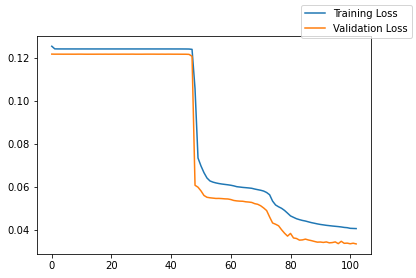

In [14]:
_, _, _, mean_losses, _ = train.load_model_with_config(configurations)

tl, vl = zip(*mean_losses)

fig,ax = plt.subplots()
ax.plot(tl, label="Training Loss")
ax.plot(vl, label="Validation Loss")

fig.legend()
plt.show()

In [15]:
trained_model = model

In [25]:
y_train_pred = train.predict(trained_model, X_train, y_train.iloc[:,3:], device="cpu") # get predictions for each train
y_train_pred_df = pd.DataFrame(y_train_pred, columns=y_train.iloc[:,3:].columns)  # put results into a dataframe
y_test_pred = train.predict(trained_model, X_test, y_test.iloc[:,3:], device="cpu") # get predictions for each train
y_test_pred_df = pd.DataFrame(y_test_pred, columns=y_test.iloc[:,3:].columns)  # put results into a dataframe

print(f'    Test set MAE (L1) loss: {mean_absolute_error(y_test.iloc[:,3:], y_test_pred_df)}')
print(f'    Test set MSE (L2) loss: {mean_squared_error(y_test.iloc[:,3:], y_test_pred_df)}')

random.seed(0)
sample = random.sample(list(y_train_pred_df.index), 10)
# sample = [0,1]

print("Train - Ground Truth (normalized):")
display(y_train.loc[sample])
# print("Train - Ground Truth (non-normalized):")
# display(normalize_data.normalize_all_columns(y_train.iloc[:,3:].loc[sample].copy(), reverse=True))  # see ground truths
print("Train - Prediction (normalized):")
display(y_train_pred_df.loc[sample])
# print("Train - Prediction (non-normalized):")
# display(normalize_data.normalize_all_columns(y_train_pred_df.loc[sample].copy(), reverse=True))  # See predictions

    Test set MAE (L1) loss: 0.12493273661470865
    Test set MSE (L2) loss: 0.03379303069237412
Train - Ground Truth (normalized):


,y_SAT_RX,y_SAT_RY,y_SAT_RZ,y_SAT_VX,y_SAT_VY,y_SAT_VZ
3541761,-0.337597,0.348024,7.381421e-01,0.137869,-0.813951,0.445995
1615835,0.393092,-0.380171,7.266822e-01,-0.691010,0.338413,0.529704
3179091,0.344555,0.849606,-3.527546e-05,0.131516,-0.061728,0.906927
3733953,-0.041272,-0.888982,-4.356367e-07,-0.142018,0.007198,0.924594
1764005,-0.844922,-0.500992,4.688127e-05,0.126346,-0.212838,0.856603
169803,0.388083,-0.809174,4.793906e-06,0.328107,0.162943,0.858474
1085975,0.753418,0.625148,-5.561441e-06,0.116210,-0.140752,0.873267
2144441,0.908543,-0.246957,1.334182e-06,-0.065261,-0.142021,0.916533
2038128,0.809286,-0.280634,2.867524e-05,-0.049568,-0.137637,0.941549
1698416,-0.523144,-0.811251,-3.366466e-07,-0.142081,0.091981,0.882788


Train - Prediction (normalized):


,y_SAT_VX,y_SAT_VY,y_SAT_VZ
3541761,-0.188248,-0.250205,0.780616
1615835,-0.098848,-0.132136,0.848709
3179091,0.034503,0.052617,0.890211
3733953,-0.042694,-0.057637,0.889157
1764005,-0.043687,-0.059006,0.888799
169803,0.152609,0.192618,0.835639
1085975,-0.027711,-0.036720,0.892266
2144441,-0.058183,-0.078430,0.879683
2038128,-0.052674,-0.071155,0.883879
1698416,-0.005122,-0.004744,0.893891


In [30]:
errors = y_train.loc[sample].iloc[:,3:] - y_train_pred_df.loc[sample]

display(errors)

display(errors.std())

display(y_train.loc[sample].iloc[:,3:])
display(y_train_pred_df.loc[sample])

,y_SAT_VX,y_SAT_VY,y_SAT_VZ
3541761,0.326117,-0.563746,-0.334621
1615835,-0.592161,0.470549,-0.319006
3179091,0.097012,-0.114345,0.016716
3733953,-0.099324,0.064835,0.035437
1764005,0.170033,-0.153832,-0.032195
169803,0.175498,-0.029675,0.022834
1085975,0.143921,-0.104032,-0.018999
2144441,-0.007078,-0.063590,0.036850
2038128,0.003106,-0.066482,0.057670
1698416,-0.136960,0.096725,-0.011103


y_SAT_VX    0.252737
y_SAT_VY    0.255647
y_SAT_VZ    0.146112
dtype: float64

,y_SAT_VX,y_SAT_VY,y_SAT_VZ
3541761,0.137869,-0.813951,0.445995
1615835,-0.691010,0.338413,0.529704
3179091,0.131516,-0.061728,0.906927
3733953,-0.142018,0.007198,0.924594
1764005,0.126346,-0.212838,0.856603
169803,0.328107,0.162943,0.858474
1085975,0.116210,-0.140752,0.873267
2144441,-0.065261,-0.142021,0.916533
2038128,-0.049568,-0.137637,0.941549
1698416,-0.142081,0.091981,0.882788


,y_SAT_VX,y_SAT_VY,y_SAT_VZ
3541761,-0.188248,-0.250205,0.780616
1615835,-0.098848,-0.132136,0.848709
3179091,0.034503,0.052617,0.890211
3733953,-0.042694,-0.057637,0.889157
1764005,-0.043687,-0.059006,0.888799
169803,0.152609,0.192618,0.835639
1085975,-0.027711,-0.036720,0.892266
2144441,-0.058183,-0.078430,0.879683
2038128,-0.052674,-0.071155,0.883879
1698416,-0.005122,-0.004744,0.893891


In [10]:
# def row_to_compare(X, y, y_pred, row):
#     epoch = X.iloc[row].EPOCH_y
#     X0 = clean_data.normalize_all_columns(X_train.iloc[row].copy(), reverse=True)
#     y0 = clean_data.normalize_all_columns(y_train.iloc[row].copy(), reverse=True)
#     y1 = clean_data.normalize_all_columns(y_train_pred_df.iloc[row].copy(), reverse=True)

#     # Ground truth
#     y0_xyz = clean_data.get_satellite_xyz(bst=0.0001,
#                                           ecc=y0.ECCENTRICITY,
#                                           aop=y0.ARG_OF_PERICENTER,
#                                           inc=y0.INCLINATION,
#                                           mea=y0.MEAN_ANOMALY,
#                                           mem=y0.MEAN_MOTION,
#                                           raa=y0.RA_OF_ASC_NODE,
#                                           epoch=epoch,)
#     # Prediction
#     y1_xyz = clean_data.get_satellite_xyz(bst=0.0001,
#                                           ecc=y1.ECCENTRICITY,
#                                           aop=y1.ARG_OF_PERICENTER,
#                                           inc=y1.INCLINATION,
#                                           mea=y1.MEAN_ANOMALY,
#                                           mem=y1.MEAN_MOTION,
#                                           raa=y1.RA_OF_ASC_NODE,
#                                           epoch=epoch,)
#     # Propigation
#     y2_xyz = clean_data.get_satellite_xyz(bst=X0.BSTAR,
#                                           ecc=X0.ECCENTRICITY,
#                                           aop=X0.ARG_OF_PERICENTER,
#                                           inc=X0.INCLINATION,
#                                           mea=X0.MEAN_ANOMALY,
#                                           mem=X0.MEAN_MOTION,
#                                           raa=X0.RA_OF_ASC_NODE,
#                                           epoch=epoch,)
#     print(f'Ground Truth: {y0_xyz}')
#     print(f'Predicted: {y1_xyz}')
#     print(f'Propigation: {y2_xyz}')
    
#     print (f'Prediction Error: {sum((y1_xyz-y0_xyz)**2)**0.5} km')
#     print (f'Propigation Error: {sum((y2_xyz-y0_xyz)**2)**0.5} km')
    

# for row in range(2):
#     print (f'Row {row}:')
#     row_to_compare(X_train, y_train, y_train_pred_df, row)
#     print('')